# File: MadhaviGhanta_Weeks_7_8_Exercises
## Name: Madhavi Ghanta
## Date: 07/28/23
## Course: DSC 540 - Weeks 7 & 8 Exercises


# ACTIVITY 9: EXTRACTING THE TOP 100 EBOOKS FROM GUTENBERG

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [2]:
# Check the SSL Certificates
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE

In [3]:
#Read the HTML from URL
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [4]:
# function to check the status of the web request
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [5]:
status_check(response)

Success!


1

In [6]:
#Decode and  HTML parsing
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [7]:
# Find all the href tags and store them in the list of links. Check how the list looks like - print first 30 elements

# List to hold all the http links in the HTML page
lst_links=[]
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [8]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [9]:
# Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.
booknum=[]
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1513, 2701, 145, 2641, 100, 37106, 16389, 67979, 394, 6761, 2160, 4085, 6593, 1259, 5197, 1399, 1342, 71292, 60547, 11, 98, 84, 1661, 345, 71291, 1184, 55387, 42475, 174, 28054, 27827, 4300, 30254, 5200, 2600, 64317, 2680, 71285, 17346, 2591, 1998, 2554, 58585, 1232, 3206, 6130, 1080, 4363, 844, 33283, 1400, 2638, 5740, 71283, 74, 42108, 45, 158, 1260, 8800, 76, 1727, 821, 1952, 24869, 205, 31284, 244, 1497, 996, 55, 768, 36, 71, 600, 2542, 71284, 135, 67098, 120, 16, 10, 8492, 71286, 40686, 5827]


In [10]:
#How does the soup object's text look like? Use .text() method and print only first 2000 characters (i.e. do not print the whole thing, it is long).
soup.text[:2000]

'\n\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright How-To\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nDonation\n\n\n\n\n\n\n\nFrequently Viewed or Downloaded\nThese listings are based on the number of times each eBook gets downloaded.\n      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counte

In [11]:
# Search in the extracted text
lst_titles_temp=[]

#Create a starting index. It should point at the text "Top 100 Ebooks yesterday".
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [12]:
# Loop 1-100 to add the strings of next 100 lines to this temporary list.
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])


In [13]:
# Print the list of tites
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Romeo and Juliet by William Shakespeare 
Moby Dick
Middlemarch by George Eliot 
A Room with a View by E
The Complete Works of William Shakespeare by William Shakespeare 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
Twenty Years After by Alexandre Dumas 
My Life 
Anna Karenina by graf Leo Tolstoy 
Pride and Prejudice by Jane Austen 
Babbage
Studies in Classic American Literature by D
Alice
A Tale of Two Cities by Charles Dickens 
Frankenstein
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Dracula by Bram Stoker 
Physical significance of entropy or of the second law by John Frederick Klein 
The Count of Monte Cristo
One Hundred Proofs That the Earth Is Not a Globe by William Carpenter 
The History of Ancient America
The Picture of Dorian Gray by

# Activity 10: To retrieve and print basic data about a movie

In [14]:
# Importing required libraries
import urllib.request, urllib.parse, urllib.error
import json

In [15]:
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [16]:
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [17]:
#Write a utility function called print_json to print the movie data from a JSON file
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [18]:
# Write a utility function to download a poster of the movie
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [19]:
# Write a utility function called search_movie to search for a movie by its name,
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [20]:
# Test the search_movie function by entering Titanic.
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=49145406
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,228,124
imdbID: tt0120338
--------------------------------------------------


In [21]:
# Test the search_movie function by entering "Random_error"
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=49145406
Error encountered:  Movie not found!


# Excercise 3: Connect to chosen API and do a simple data pull
## Connecting to The Movie Database API & retrieving top 5 rated movies
### https://www.themoviedb.org/


In [22]:
import pandas as pd
import requests

In [23]:
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=5a1c2fef27bd067fd0fd47c3af916d79')

In [24]:
temp_df = pd.DataFrame(response.json()['results'])

In [25]:
top_five_movies = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average']]

In [26]:
top_five_movies.head()

,id,title,overview,release_date,popularity,vote_average
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,137.694,8.7
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,100.272,8.7
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,68.643,8.6
3,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,28.244,8.6
4,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,49.204,8.6


In [27]:
df = pd.DataFrame()

# Excercise 4: Visualizations

In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('breast-cancer.csv')

## Plot Histogram

<AxesSubplot:title={'center':'Histogram of Radius_Mean'}, xlabel='Radius_Mean', ylabel='Frequency'>

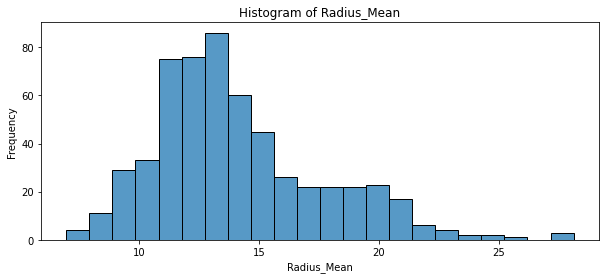

In [30]:
plt.figure(figsize=(10,4))
plt.xlabel("Radius_Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Radius_Mean")
sns.histplot(df['radius_mean'])

## Plot Pie chart

Text(0.5, 1.0, 'diagnosis')

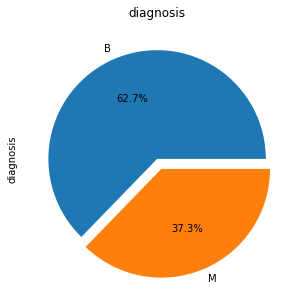

In [31]:
plt.figure(figsize=(5,5))
df['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.title('diagnosis')

## Scatter plot

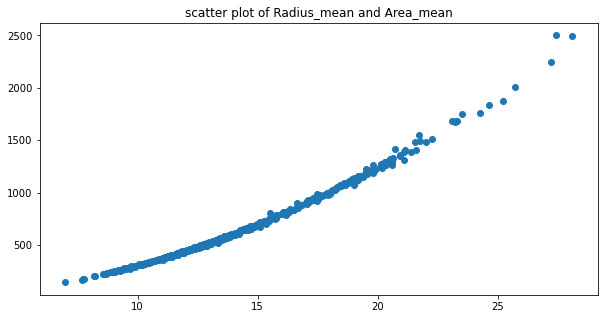

In [32]:
plt.figure(figsize = (10,5))
plt.scatter(df['radius_mean'],df['area_mean'])
plt.title("scatter plot of Radius_mean and Area_mean")
plt.show()

## Line chart

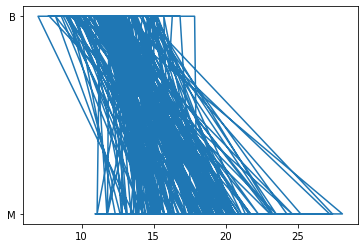

In [33]:
plt.plot(df['radius_mean'],df['diagnosis'])